First analyzing the whole dataset to see what all is needed in data cleaning process

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


In [3]:
df = pd.read_csv("electricity_consumption_optimization_dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (52585, 40)


,Timestamp,Building Type,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,Building Orientation,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator,Carbon Emission Reduction Category
0,2018-01-01 00:00:00,Residential,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,...,16.208574,13.341547,6.719547,0,South,21.425365,80.807871,14.115263,0,Moderate Reduction
1,2018-01-01 01:00:00,Industrial,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,...,16.081108,11.750894,7.041203,1,South,34.385339,79.679998,4.107683,0,Moderate Reduction
2,2018-01-01 02:00:00,Commercial,58.836657,19.182581,65.030972,-16.599946,0.582297,10.385565,0.060282,278.064969,...,17.463861,24.297381,12.874189,0,North,67.588352,84.571954,4.130955,0,Moderate Reduction
3,2018-01-01 03:00:00,Residential,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,...,14.132527,24.586379,9.526672,0,South,37.714465,95.953736,8.681566,0,No Reduction
4,2018-01-01 04:00:00,Residential,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,...,20.960512,24.482306,10.039815,0,North,36.321629,68.227000,19.631869,0,Moderate Reduction


In [4]:
df

,Timestamp,Building Type,Energy Consumption (kWh),Temperature (°C),Humidity (%),Occupancy Rate (%),Lighting Consumption (kWh),HVAC Consumption (kWh),Energy Price ($/kWh),Carbon Emission Rate (g CO2/kWh),...,Energy Savings Target (%),Room-Level Energy Consumption (kWh),Zonal Heating/Cooling Data (kWh),Electric Vehicle Charging Status,Building Orientation,IoT Sensor Count,Thermal Comfort Index,Energy Savings Potential (%),Peak Demand Reduction Indicator,Carbon Emission Reduction Category
0,2018-01-01 00:00:00,Residential,74.679912,31.357437,62.472886,49.293544,9.892054,9.073339,0.053297,341.764320,...,16.208574,13.341547,6.719547,0,South,21.425365,80.807871,14.115263,0,Moderate Reduction
1,2018-01-01 01:00:00,Industrial,46.592761,30.229121,63.067770,65.039117,11.063696,26.487881,0.019031,427.270057,...,16.081108,11.750894,7.041203,1,South,34.385339,79.679998,4.107683,0,Moderate Reduction
2,2018-01-01 02:00:00,Commercial,58.836657,19.182581,65.030972,-16.599946,0.582297,10.385565,0.060282,278.064969,...,17.463861,24.297381,12.874189,0,North,67.588352,84.571954,4.130955,0,Moderate Reduction
3,2018-01-01 03:00:00,Residential,53.586516,16.700048,67.405643,27.398152,3.580005,8.199913,0.209318,691.906306,...,14.132527,24.586379,9.526672,0,South,37.714465,95.953736,8.681566,0,No Reduction
4,2018-01-01 04:00:00,Residential,37.800448,29.620051,55.069770,74.220380,17.823608,12.268133,0.225335,620.526286,...,20.960512,24.482306,10.039815,0,North,36.321629,68.227000,19.631869,0,Moderate Reduction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,2023-12-31 20:00:00,Residential,78.697373,18.669766,76.145160,86.565125,11.475367,13.489796,0.119900,499.016888,...,18.656061,8.972060,18.585041,0,South,59.425428,70.658451,14.399685,0,Low Reduction
52581,2023-12-31 21:00:00,Residential,59.400463,24.814296,93.473230,51.380712,18.418070,25.319140,0.180057,344.329532,...,27.028035,23.793959,20.340068,0,East,50.490422,89.069748,20.619243,0,Low Reduction
52582,2023-12-31 22:00:00,Residential,65.395535,3.952222,75.281979,49.625698,17.637973,19.546613,0.168849,317.509517,...,22.125447,20.461445,7.762880,0,South,74.773075,70.760759,15.645947,0,Moderate Reduction
52583,2023-12-31 23:00:00,Residential,58.505085,12.342418,54.181047,87.792609,4.205146,-4.032314,0.139890,183.725258,...,11.750403,10.326719,-1.556912,0,South,75.925739,73.370549,11.999294,0,No Reduction


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            52585 non-null  object 
 1   Building Type                        52585 non-null  object 
 2   Energy Consumption (kWh)             52585 non-null  float64
 3   Temperature (°C)                     52585 non-null  float64
 4   Humidity (%)                         52585 non-null  float64
 5   Occupancy Rate (%)                   52585 non-null  float64
 6   Lighting Consumption (kWh)           52585 non-null  float64
 7   HVAC Consumption (kWh)               52585 non-null  float64
 8   Energy Price ($/kWh)                 52585 non-null  float64
 9   Carbon Emission Rate (g CO2/kWh)     52585 non-null  float64
 10  Power Factor                         52585 non-null  float64
 11  Voltage Levels (V)          

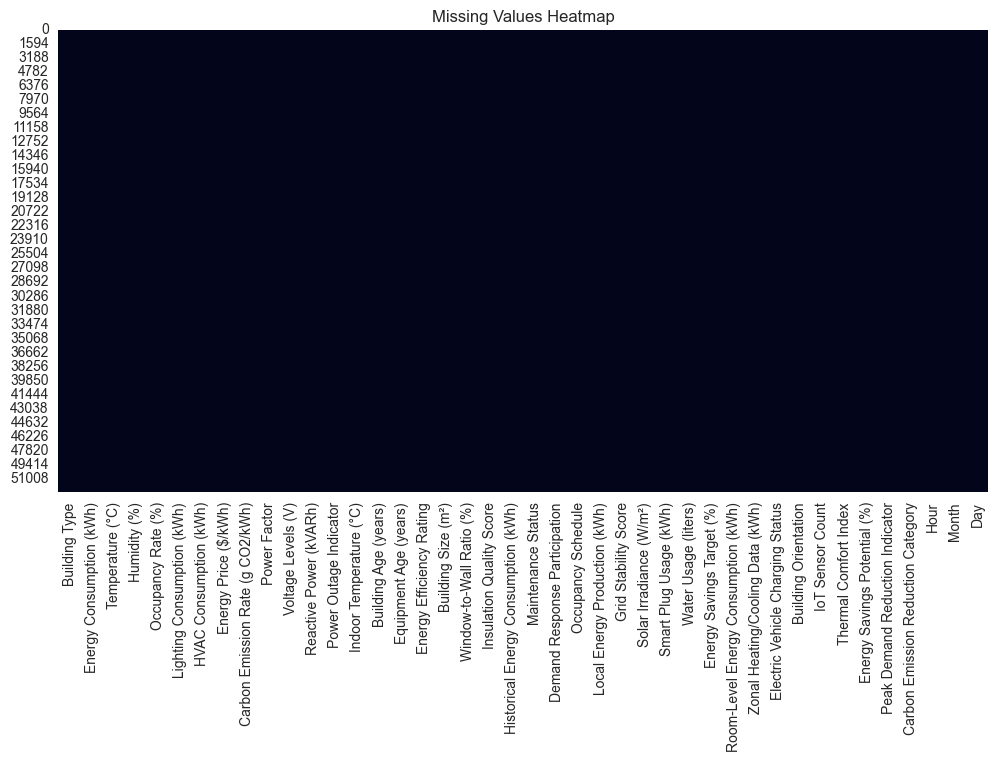

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Since no missing value therefore the heatmap is blank 



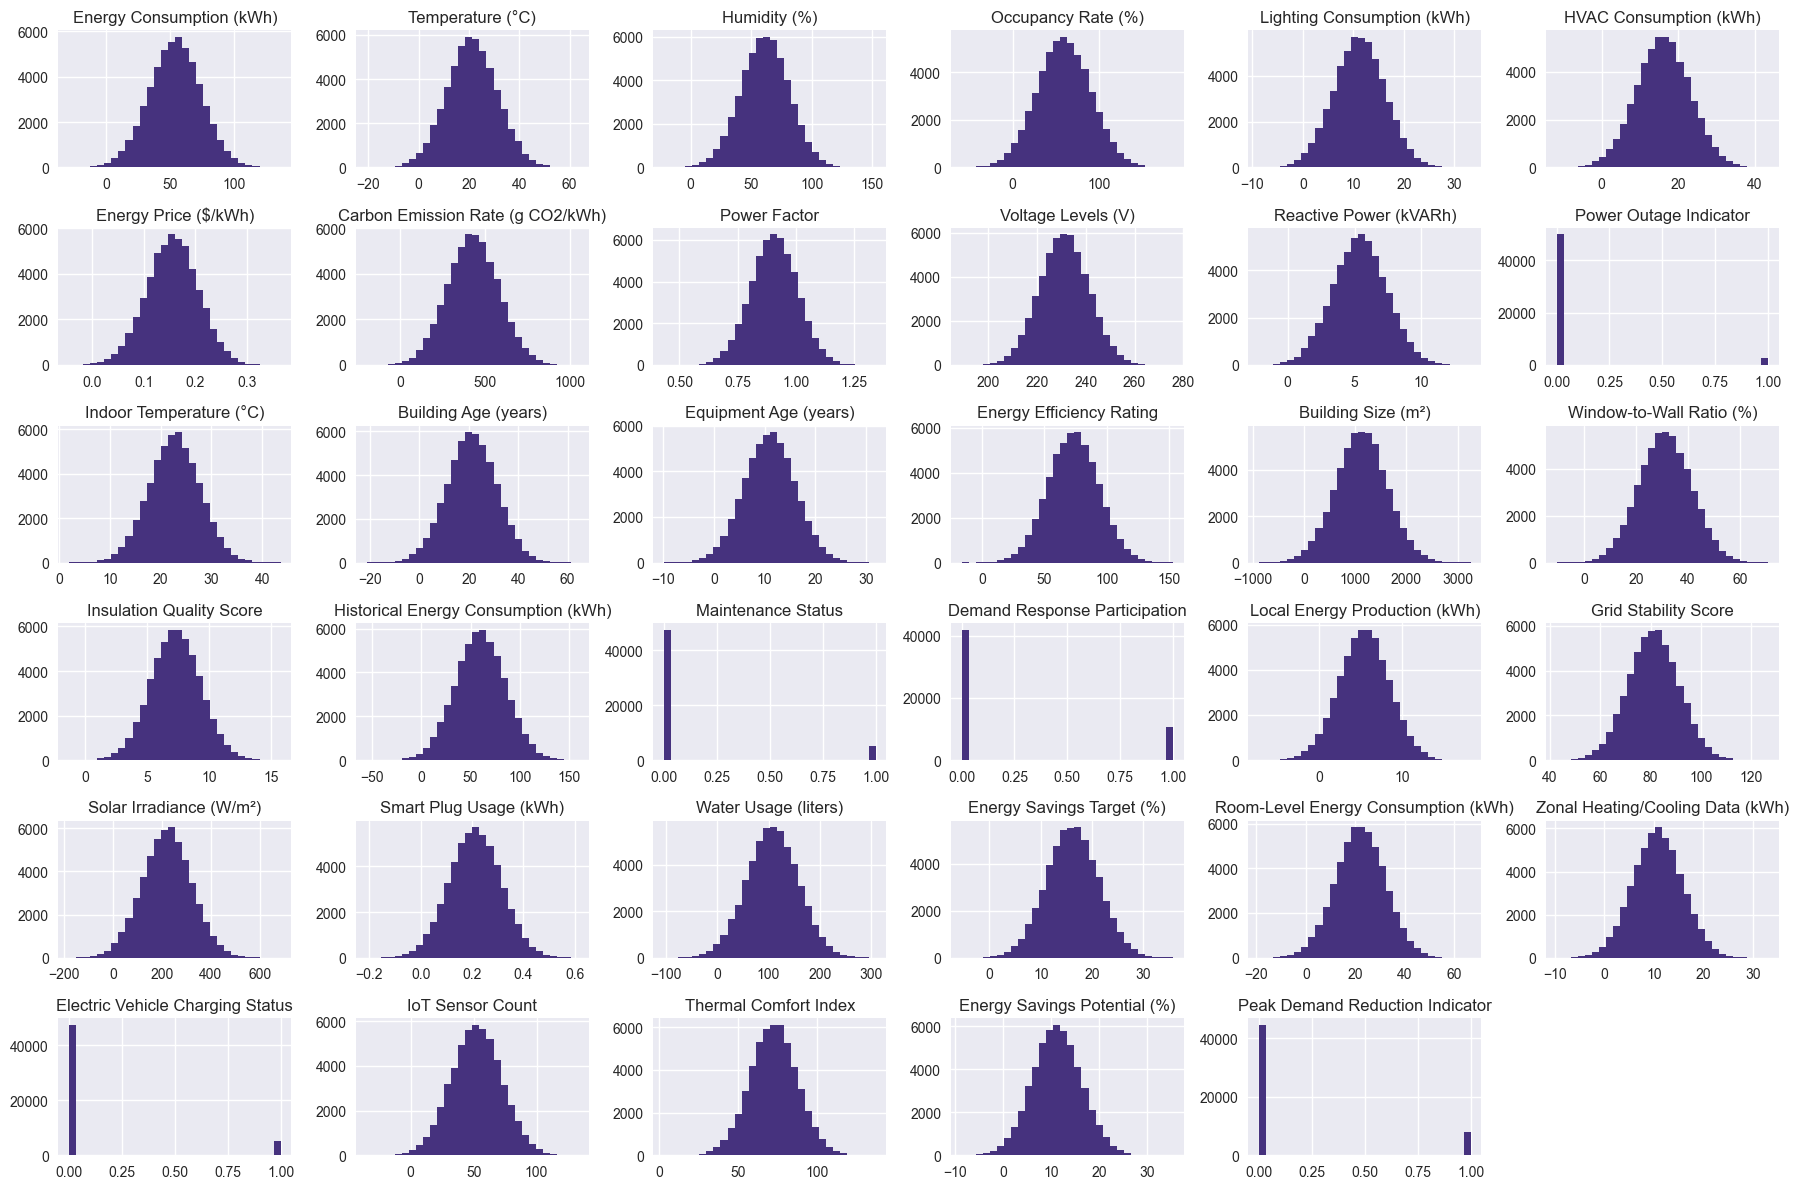

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(18,12), bins=30)
plt.tight_layout()
plt.show()

Now since most of the histograms are like continous and have a symmetric curve. so on all of those clustering will work good. for the binary colmns either i can drop them or use them after scaling. But generally using binary colmns hampers the work os distance based clustering

Now seeing for outliers

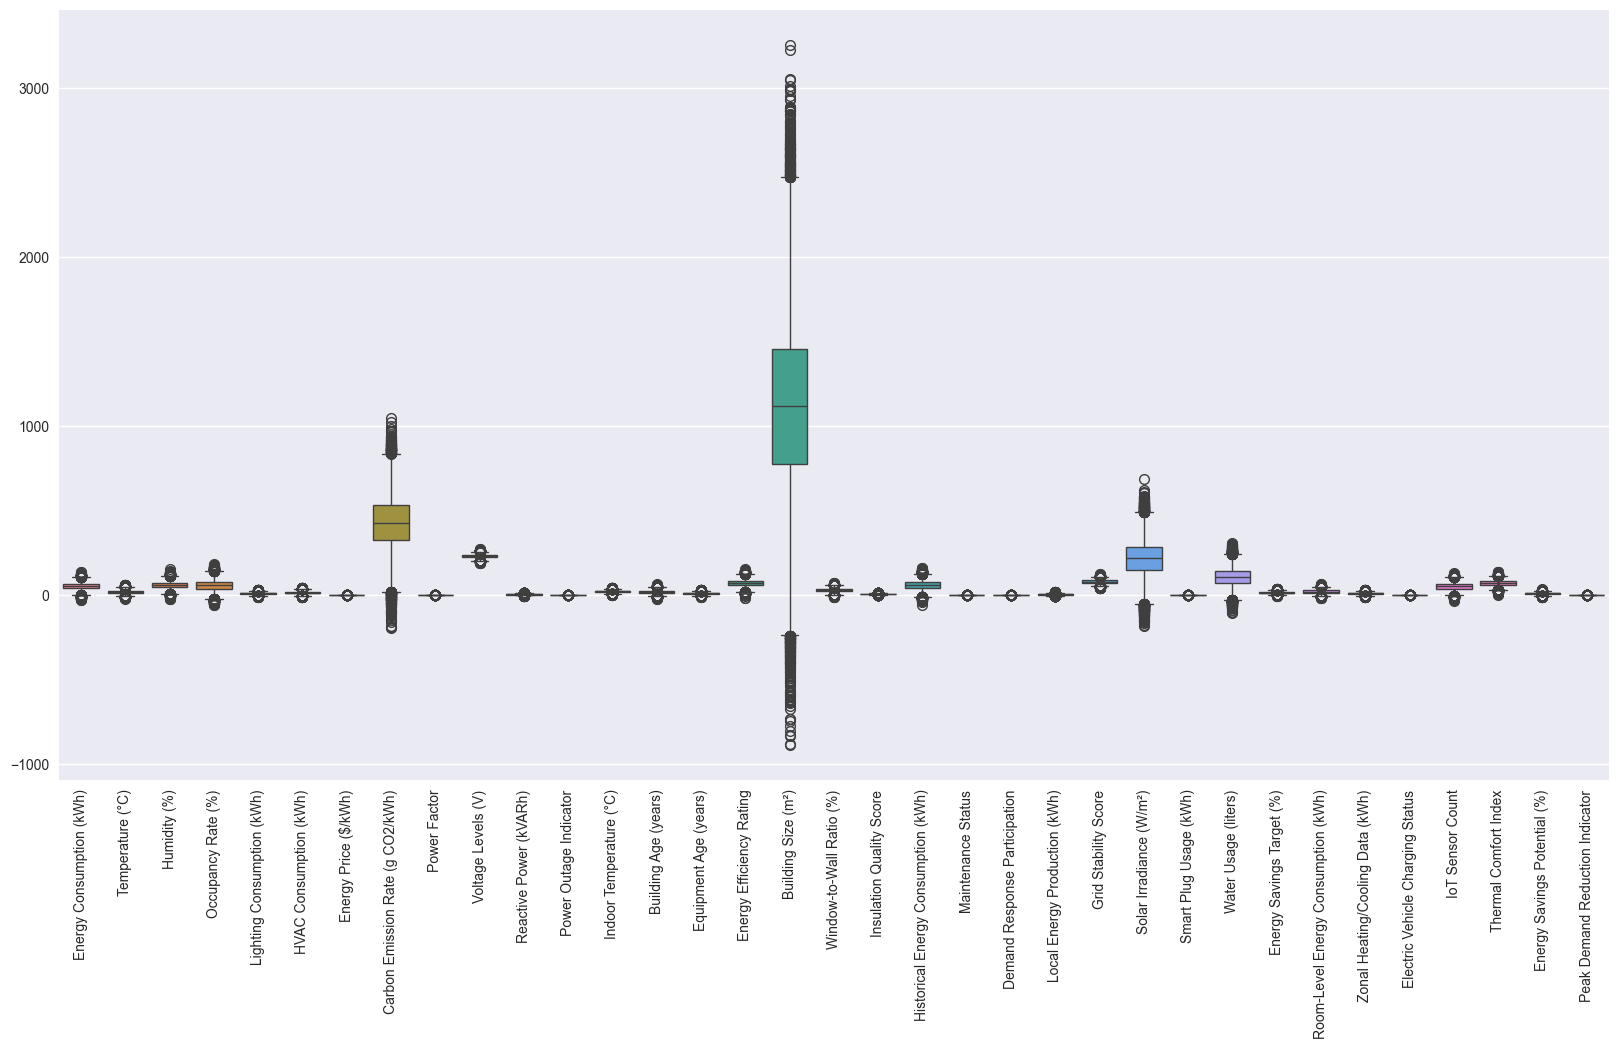

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

Insights:- Feature sccaling is necessary 
some colmns haev -ve values 
many colmns have outliers

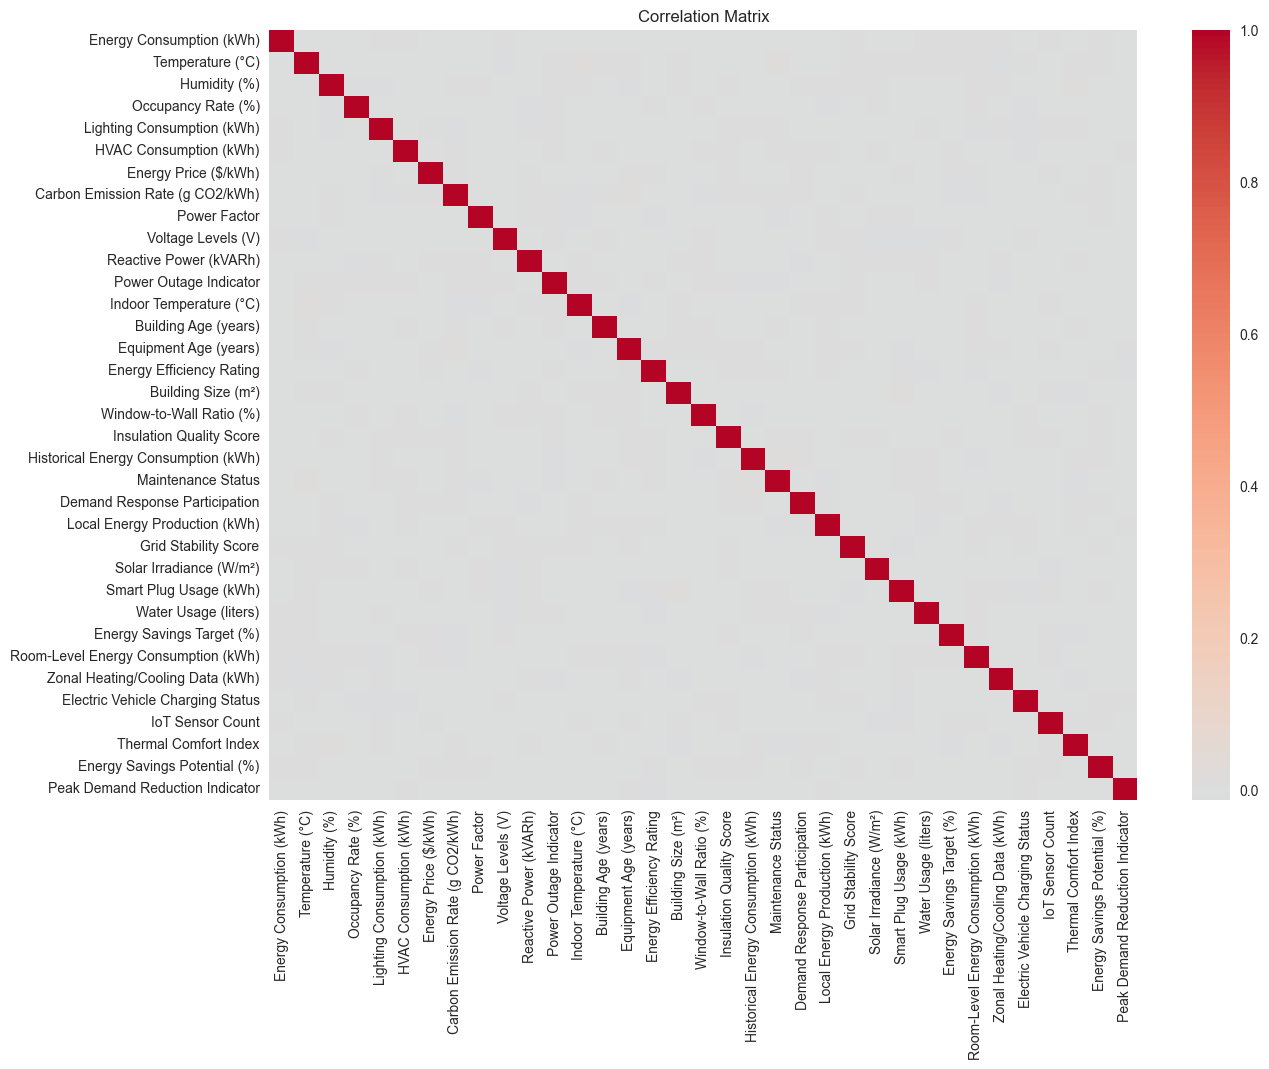

In [16]:
plt.figure(figsize=(14,10))
corr = df[numerical_cols].corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix is not correlating most of the feature, meaning i cant do k means blindly i have to do feature enginnering on it or do dimensinality reduction
This matrix kinda proves that this data is synthetically generated


In [18]:
df.corr(numeric_only=True)
corr = df.corr()
corr.unstack().sort_values(ascending=False)

ValueError: could not convert string to float: 'Residential'

In [8]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Timestamp                            52585 non-null  datetime64[ns]
 1   Building Type                        52585 non-null  object        
 2   Energy Consumption (kWh)             52585 non-null  float64       
 3   Temperature (°C)                     52585 non-null  float64       
 4   Humidity (%)                         52585 non-null  float64       
 5   Occupancy Rate (%)                   52585 non-null  float64       
 6   Lighting Consumption (kWh)           52585 non-null  float64       
 7   HVAC Consumption (kWh)               52585 non-null  float64       
 8   Energy Price ($/kWh)                 52585 non-null  float64       
 9   Carbon Emission Rate (g CO2/kWh)     52585 non-null  float64       
 10  Power Fact

In [24]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month
#df = df.drop(columns=["Timestamp"])
df

KeyError: 'Timestamp'

Converted the timestamp colmn which was earlier a string one into date and time colmn so that i can extract meaningful date time hour etc from it 
and then dropped it since it is no more use 

In [19]:
sns.lineplot(x='hour', y='Energy Consumption (kWh)', data=df)
plt.title("Energy Consumption by Hour")
plt.show()

ValueError: Could not interpret value `hour` for `x`. An entry with this name does not appear in `data`.